In [1]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

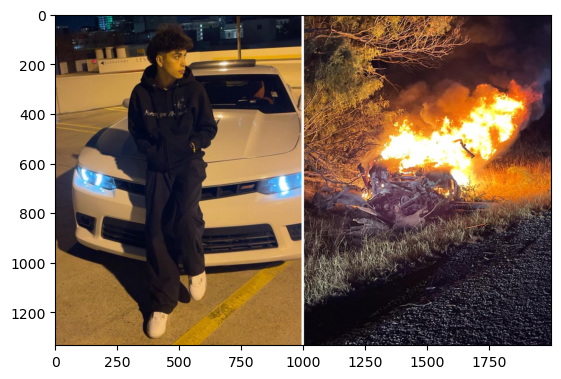

In [2]:
os.listdir('data')
import cv2
data_dir='data'
image_exts=['jpeg','jpg','bmp','png']
image_exts
img=cv2.imread(os.path.join('data','accident','salazar.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
from PIL import Image
import os
import cv2

# Define supported image extensions
image_exts = ['JPEG', 'JPG', 'BMP', 'PNG']  # Pillow uses uppercase format names

# Iterate through each class folder and image
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # Read the image with OpenCV to ensure it's not corrupt
            img = cv2.imread(image_path)
            
            # Open the image using Pillow to check its format
            with Image.open(image_path) as img_pil:
                img_format = img_pil.format.upper()  # Get image format and convert to uppercase

            # Check if the image format is in the allowed extensions list
            if img_format not in image_exts:
                print(f'Image not in supported formats list: {image_path}')
                os.remove(image_path)  # Remove the unsupported image
        except Exception as e:
            print(f'Issue with image {image_path}: {e}')


In [4]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [5]:
import numpy as np
data=tf.keras.utils.image_dataset_from_directory('data')


Found 1655 files belonging to 2 classes.


In [6]:
data_iterator=data.as_numpy_iterator()

In [7]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000002C1FC2764D0>)

In [8]:
batch=data_iterator.next()
# 0=accident  1=non_accident

In [9]:
batch[0].shape

(32, 256, 256, 3)

In [10]:
batch[1]

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

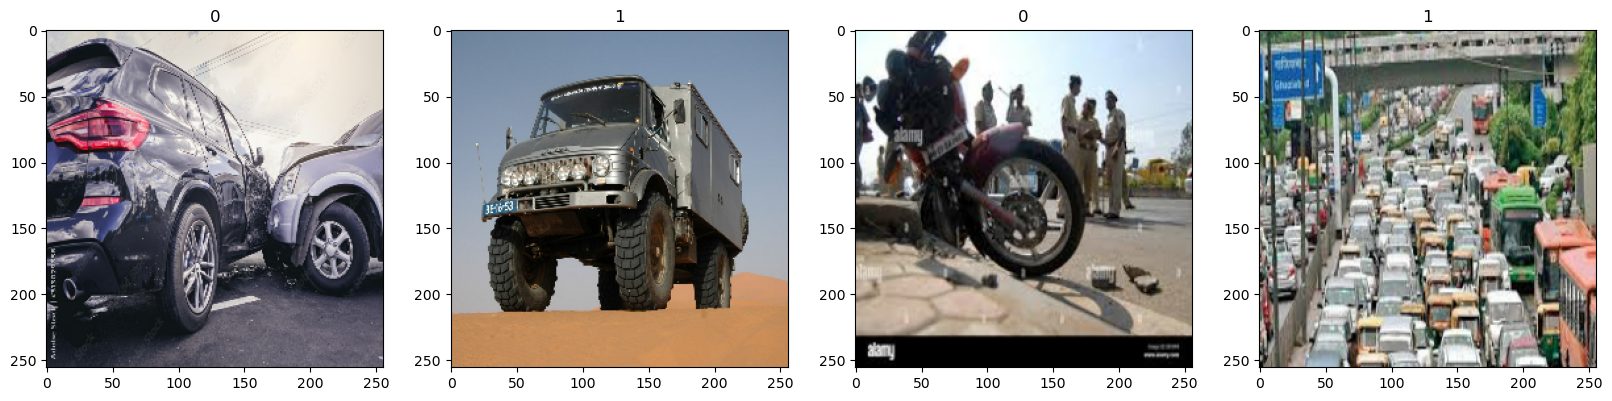

In [11]:
fig, ax= plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [12]:
scaled=batch[0]/255


In [13]:
data=data.map(lambda x,y: (x/255 ,y))

In [14]:
scaled_iterator=data.as_numpy_iterator()

In [15]:
batch=scaled_iterator.next()

In [16]:
batch[0].max()

1.0

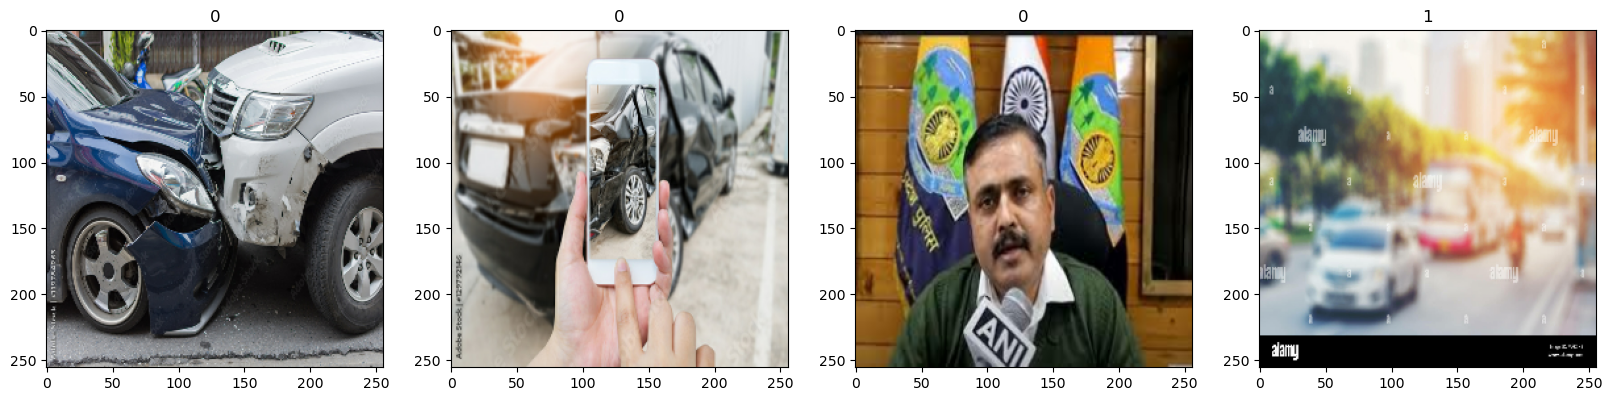

In [17]:
fig, ax= plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [18]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)

In [19]:
len(data)

52

In [20]:
test_size

5

In [21]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model=Sequential()

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Initialize the Sequential model
model = Sequential()

# Add Input layer
model.add(Input(shape=(256, 256, 3)))  # Define the input shape here

# Add Conv2D and other layers
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [25]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
logdir='logs_2'

In [28]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 25s 457ms/step - accuracy: 0.5594 - loss: 0.8514 - val_accuracy: 0.7131 - val_loss: 0.6059
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 475ms/step - accuracy: 0.6544 - loss: 0.6469 - val_accuracy: 0.7216 - val_loss: 0.5336
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 479ms/step - accuracy: 0.6977 - loss: 0.5876 - val_accuracy: 0.7131 - val_loss: 0.5806
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 484ms/step - accuracy: 0.7772 - loss: 0.4822 - val_accuracy: 0.7983 - val_loss: 0.4331
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 476ms/step - accuracy: 0.8333 - loss: 0.3831 - val_accuracy: 0.8466 - val_loss: 0.3951
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 475ms/step - accuracy: 0.8553 - loss: 0.3035 - val_accuracy: 0.8295 - val_loss: 0.3639
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 514ms/step - accuracy: 0.9152 - loss: 0.2364 - val_accuracy: 0.8580 - val_loss: 0.3630
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 478ms/step - accuracy: 0.9455 - loss: 0.1564 - val_accu

In [30]:
hist.history

{'accuracy': [0.6293402910232544,
  0.6710069179534912,
  0.7213541865348816,
  0.7803819179534912,
  0.8359375,
  0.8611111044883728,
  0.9210069179534912,
  0.9348958134651184,
  0.9479166865348816,
  0.9609375,
  0.9739583134651184,
  0.9618055820465088,
  0.9739583134651184,
  0.9921875,
  0.9913194179534912,
  0.9895833134651184,
  0.9800347089767456,
  0.9904513955116272,
  0.9973958134651184,
  0.9965277910232544],
 'loss': [0.7251718044281006,
  0.622503936290741,
  0.5685669779777527,
  0.4634461998939514,
  0.38618069887161255,
  0.31293153762817383,
  0.2349490523338318,
  0.18298794329166412,
  0.1419205218553543,
  0.10916756838560104,
  0.07756102085113525,
  0.10189341008663177,
  0.06896127015352249,
  0.03915780037641525,
  0.03207426518201828,
  0.03904314339160919,
  0.07587853074073792,
  0.032408639788627625,
  0.018713992089033127,
  0.01990111730992794],
 'val_accuracy': [0.7130681872367859,
  0.7215909361839294,
  0.7130681872367859,
  0.7982954382896423,
  0.84

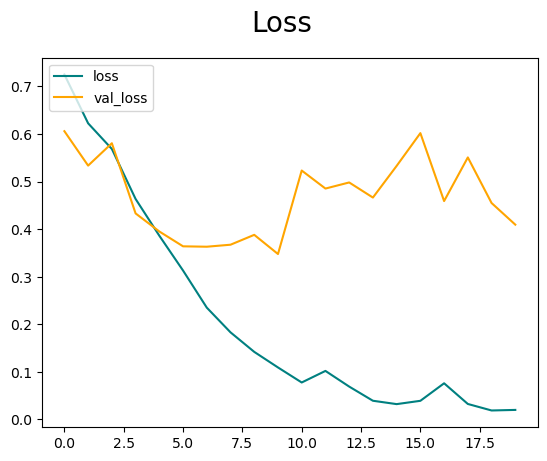

In [31]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

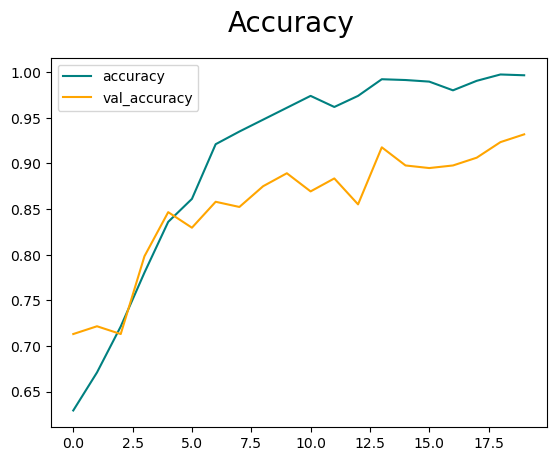

In [32]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [35]:
len(test)

5

In [36]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


In [37]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.8125,Recall:0.8666666746139526,Accuracy:0.9006622433662415


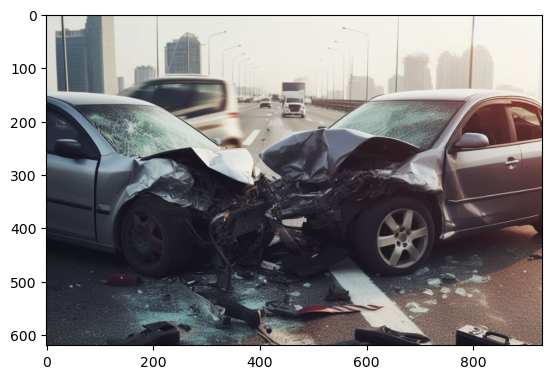

In [70]:
import cv2
img=cv2.imread('accident_test8.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

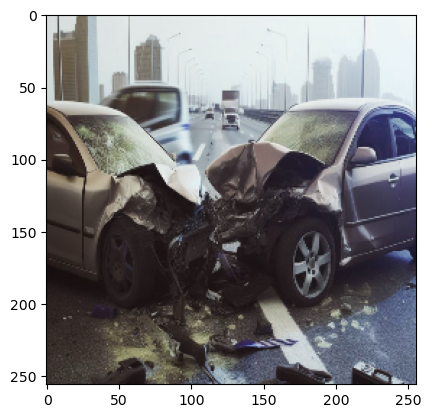

In [71]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [72]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [73]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [74]:
yhat 

array([[0.00034926]], dtype=float32)

In [75]:
if yhat>0.5:
    print(f'no accident')
else:
    print(f'accident')

accident


In [78]:
# Save the entire model to a folder called 'saved_model'
model.save('final_saved_model/my_model.keras')

In [82]:
from tensorflow.keras.models import load_model

In [85]:
loaded_model = load_model('final_saved_model/my_model.keras', compile=False)
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

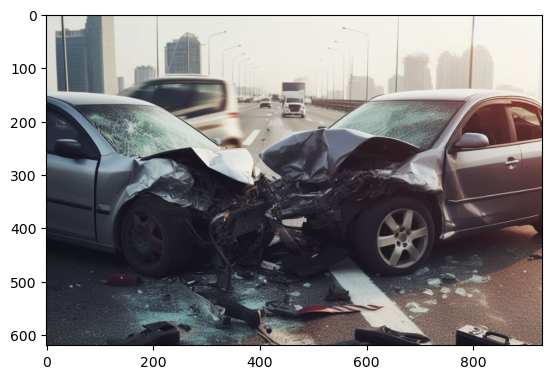

In [86]:
import cv2
img=cv2.imread('accident_test8.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

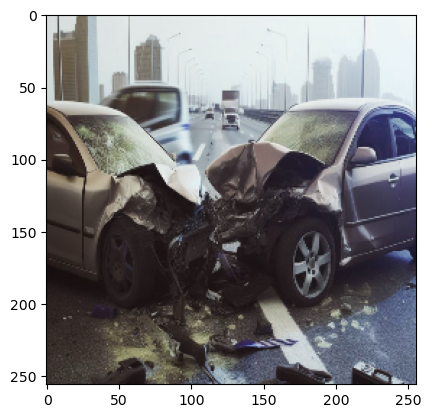

In [87]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [88]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [89]:
yhat=loaded_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


In [90]:
yhat 

array([[0.00034926]], dtype=float32)

In [91]:
if yhat>0.5:
    print(f'no accident')
else:
    print(f'accident')

accident
